In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd

# 데이터 시각화의 기초

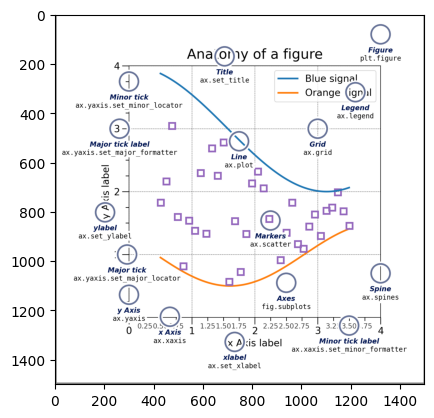

In [2]:
plt.imshow(mpimg.imread('figures/anatomy.png'))
plt.show()

* Figure : 피규어 전체
* Axes : 그림 내부에서의 좌표축 및 개별 그림. 한 Figure에 여러 그래프 존재도 가능.
* Line : 선 그래프에서의 선
* Markers : 점 그래프에서의 점
* Legend : 범례
* Title : 제목
* Grid : 격자
* Splines : 윤곽선
* X axis label/Y axis label : x축/y축 레이블
* Major/Minor tick : 메인/서브 눈금
* Major/Minor tick label : 메인/서브 눈금 레이블

# 저수준 시각화 : `matplotlib`

In [26]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## scatterplot

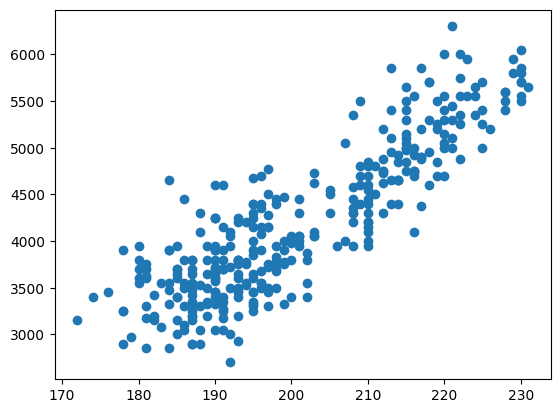

In [4]:
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.show()

## barplot

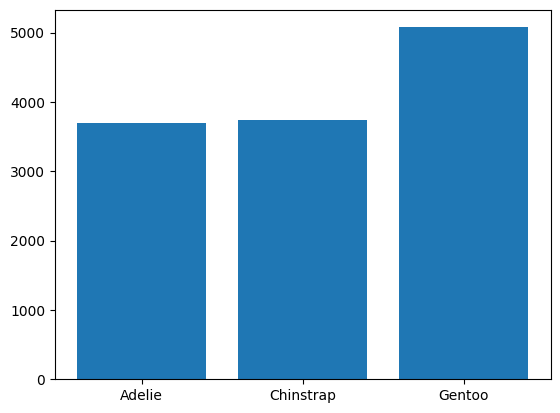

In [5]:
df_grouped = df.groupby('species')['body_mass_g'].mean().reset_index()
plt.bar(df_grouped['species'], df_grouped['body_mass_g'])
plt.show()

## histplot

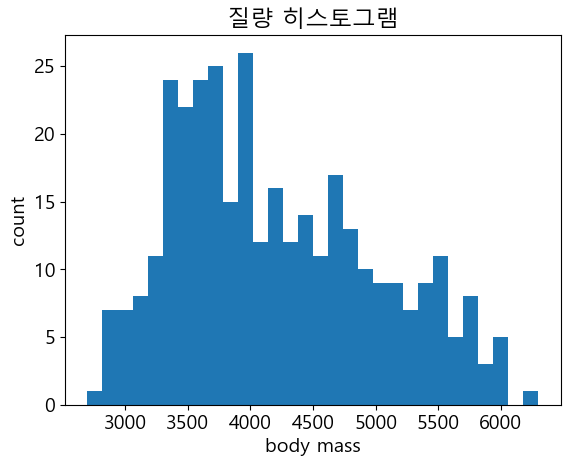

In [6]:
plt.rc('font', family='Malgun Gothic', size=14)
plt.hist(df['body_mass_g'], bins=30)
plt.xlabel('body mass')
plt.ylabel('count')
plt.title('질량 히스토그램')
plt.show()

## lineplot

In [7]:
df_line = pd.read_csv('https://fred.stlouisfed.org/series/PSAVERT/downloaddata/PSAVERT.csv', parse_dates=['DATE'])
df_line.head()

,DATE,VALUE
0,1959-01-01,11.3
1,1959-02-01,10.6
2,1959-03-01,10.3
3,1959-04-01,11.2
4,1959-05-01,10.6


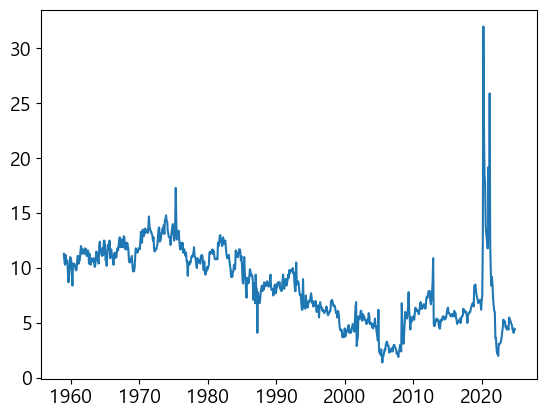

In [8]:
plt.plot(df_line['DATE'], df_line['VALUE'])
plt.show()

## multi-axes

두 유형의 API 존재.

* Stateless API : OOP 기반. 내가 지정한 figure 및 axes에 그림을 그리기
* Stateful API : 현재의 figure 및 axes에 그림을 더 그리기 - `matplotlib.pyplot` 기반!

### Stateless API

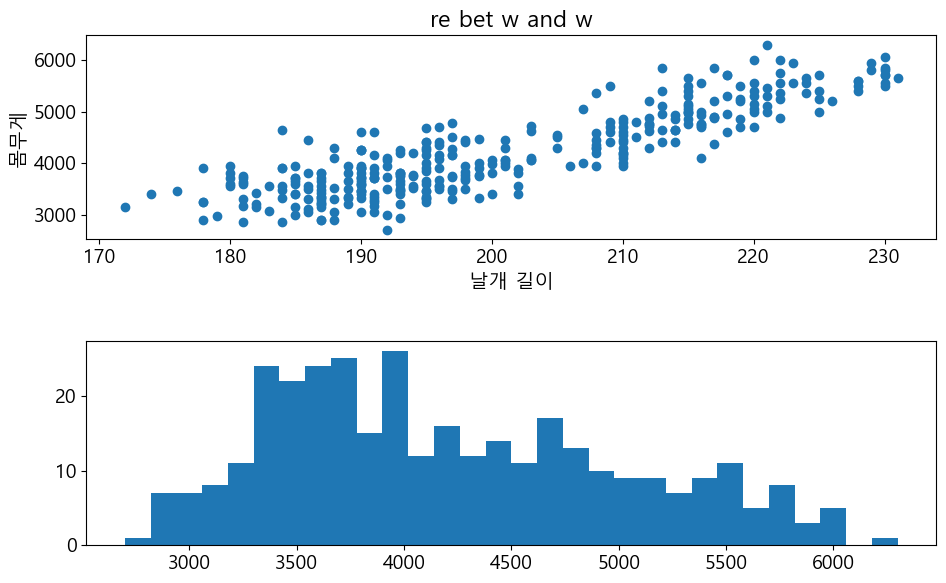

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# 첫 그림
axes[0].scatter(df['flipper_length_mm'], df['body_mass_g'])
axes[0].set_xlabel('날개 길이')
axes[0].set_ylabel('몸무게')
axes[0].set_title('re bet w and w')

# 두 번째 그림
axes[1].hist(df['body_mass_g'], bins = 30)


# 그래프 간격 조정 및 표시
plt.subplots_adjust(left = 0.1, right = 0.95, 
                    bottom = 0.1, top = 0.95,
                    wspace = 0.5, hspace = 0.5)
plt.show()

`subplots` 이용. figure 내에 원하는 만큼 axes 개체를 나누고, axes 각각을 지정하여 그래프를 표현한다.

### Stateful API

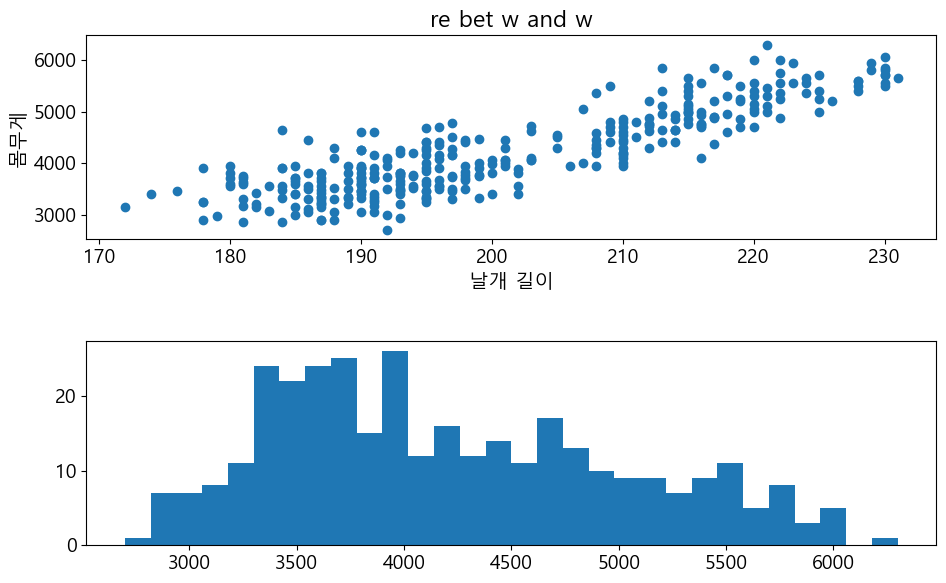

In [37]:
plt.figure(figsize=(10, 6))

# 첫 그림
plt.subplot(2, 1, 1)
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.xlabel('날개 길이')
plt.ylabel('몸무게')
plt.title('re bet w and w')

# 두 번째 그림
plt.subplot(2, 1, 2)
plt.hist(df['body_mass_g'], bins = 30)


# 그래프 간격 조정 및 표시
plt.subplots_adjust(left = 0.1, right = 0.95, 
                    bottom = 0.1, top = 0.95,
                    wspace = 0.5, hspace = 0.5)

`subplot` 이용. 현재 axes 설정시 해당 부분에 그림을 그린다.

## `pandas` 이용 시각화

시리즈 혹은 데이터프레임을 바로 그래프로 표현 가능하다. 다음과 같은 그래프가 존재한다.

* line : 선그래프
* bar : 수직 막대그래프/barh : 수평 막대그래프
* hist : 히스토그램
* box : 박스플롯
* kde : 커널 밀도 그래프
* area : 면적 그래프
* pie : 파이 그래프
* scatter : 산점도/hexbin : 고밀도 산점도

In [10]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


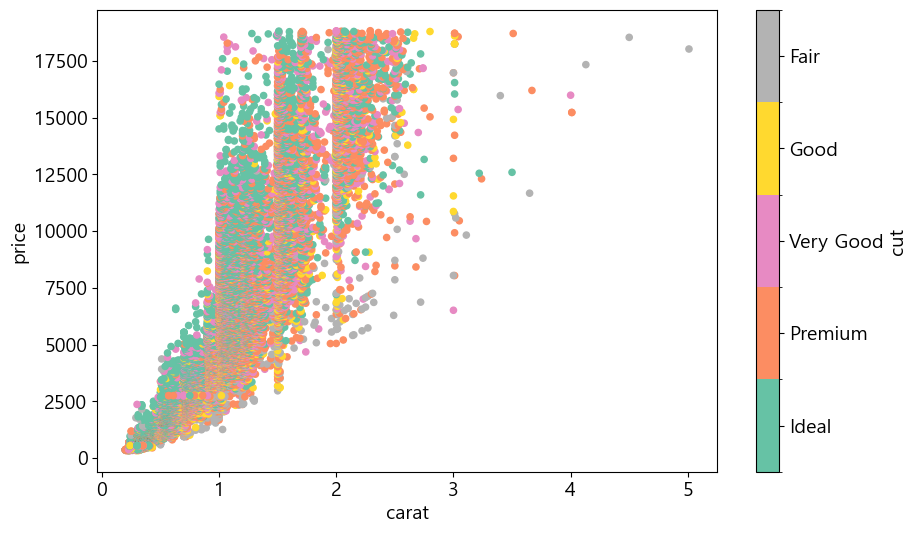

In [13]:
plt.rc('font', family = 'Malgun Gothic')
df.plot.scatter(x = 'carat', y = 'price', c = 'cut', cmap = 'Set2', figsize = (10, 6))
plt.show()

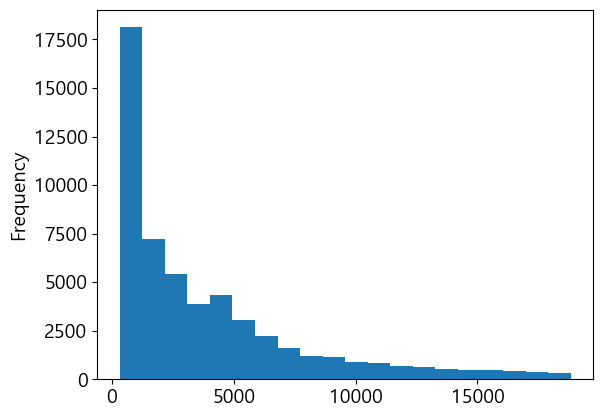

In [14]:
plt.rc('font', family = 'Malgun Gothic')
df['price'].plot.hist(bins = 20)
plt.show()

C:\Users\Na\AppData\Local\Temp\ipykernel_34912\2127987428.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('color')['carat'].mean().plot.bar(figsize=(10, 6))


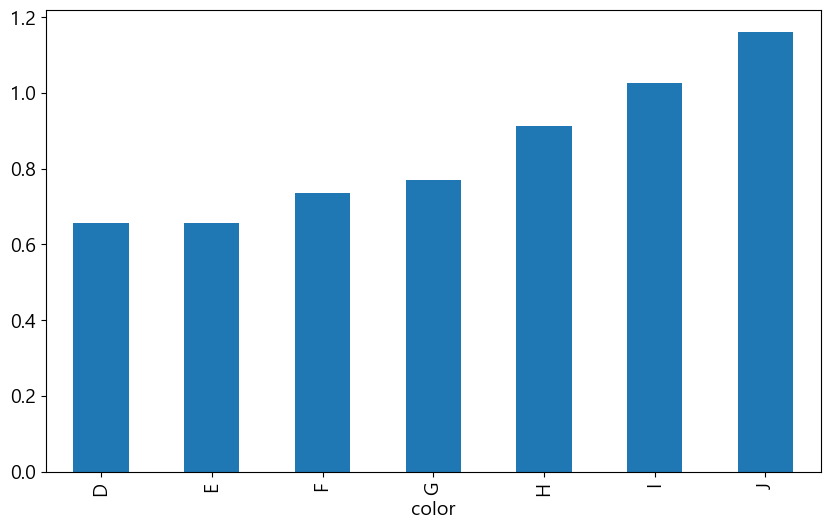

In [22]:
plt.rc('font', family = 'Malgun Gothic')
df.groupby('color')['carat'].mean().plot.bar(figsize=(10, 6))
plt.show()

# 고수준 시각화 : `seaborn`

R 스타일의 시각화이다.

In [39]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


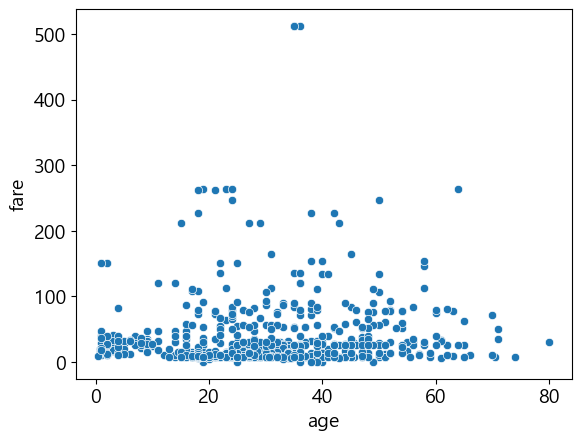

In [40]:
sns.scatterplot(data=df, x='age', y='fare')
plt.show()

C:\Users\Na\AppData\Local\Temp\ipykernel_34912\417786013.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')


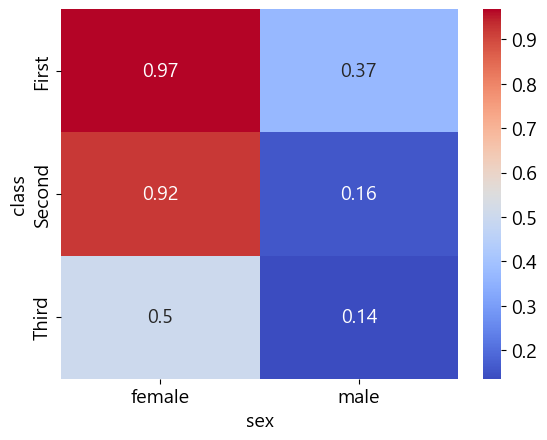

In [42]:
df_pivot = df.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
sns.heatmap(df_pivot, annot=True, cmap='coolwarm')
plt.show()

# multiaxes

seaborn의 그래프는 'figure-level'과 'axes-level'로 나뉜다.

* figure-level : matplotlib과 별개로 seaborn의 피규어를 만들어 그래프를 나타낸다. 이 경우 facetgird를 통해 레이아웃을 변경한다.
* axes-level : matplotlib에 나타낸다.

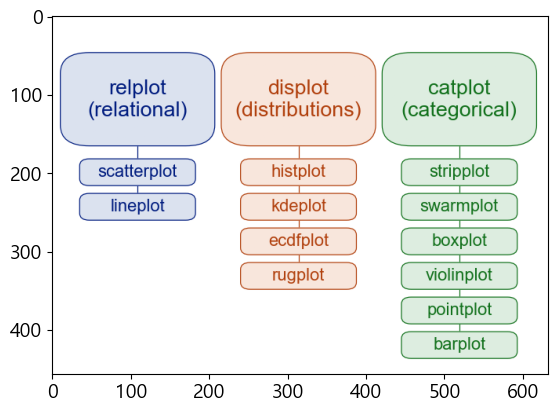

In [43]:
plt.imshow(mpimg.imread('figures/sns_overview.png'))
plt.show()

relplot, displot, catplot은 figure-level이고, 아래의 것들이 axes level이다.

### figure-level

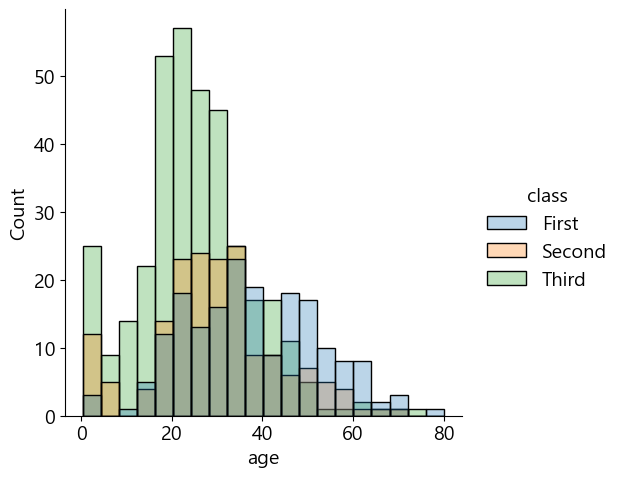

In [44]:
sns.displot(df, x='age', hue='class', kind='hist', alpha=0.3)
plt.show()

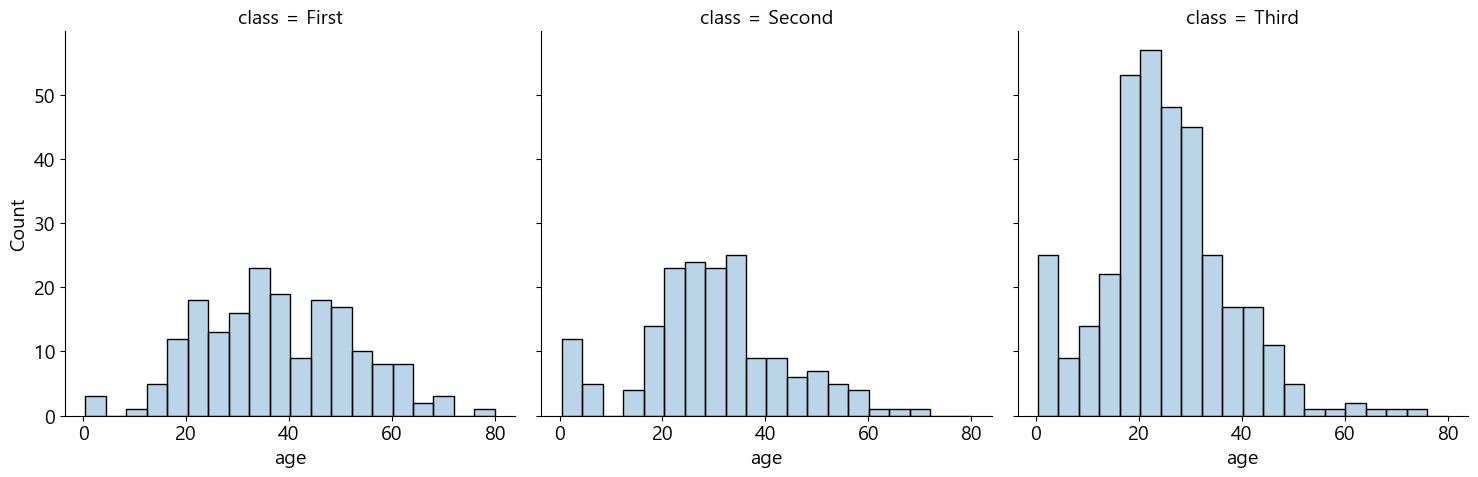

In [45]:
sns.displot(df, x='age', col='class', kind='hist', alpha=0.3)
plt.show()

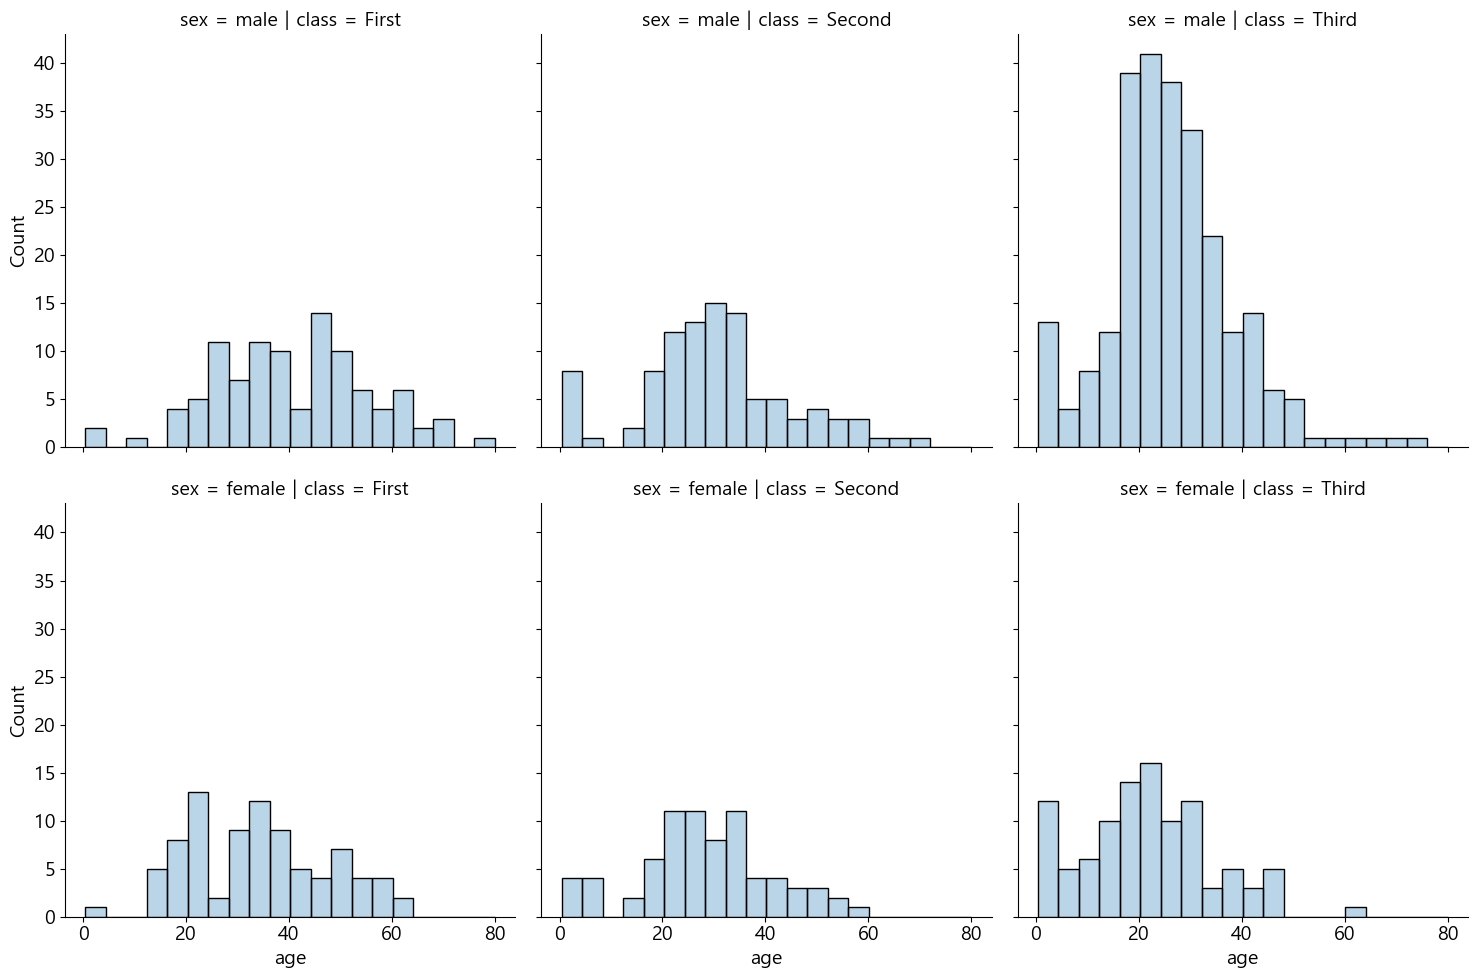

In [46]:
sns.displot(df, x='age', col='class', row='sex', kind='hist', alpha=0.3)
plt.show()

### axes-level

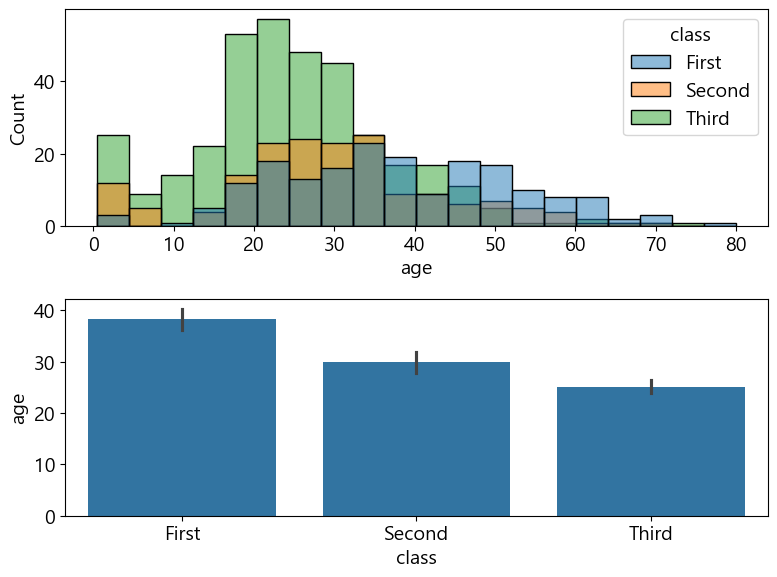

In [47]:
plt.rc('font', family='Malgun Gothic')

g, axes = plt.subplots(2, 1, figsize=(8, 6))
sns.histplot(data=df, x = 'age', hue = 'class', ax=axes[0])
sns.barplot(data=df, x='class', y='age', ax=axes[1])

g.tight_layout()
plt.show()